In [8]:
import sys
import os
sys.path.append(os.path.abspath('../..'))


# from scan_engine.status_fields_config_24summ import STATUS_FIELDS_CONFIG
from status_fields_config_oct3v1_brws_250522 import STATUS_FIELDS_CONFIG

from utlis.scan_engine_utlis.scan_eng_big_utlis import log_folder_to_parquet_sep

if __name__ == "__main__":
    base_folder = "/data/big_rim/rsync_dcc_sum/Oct3V1" #"/data/big_rim/rsync_dcc_sum/24summ" #"/data/big_rim/rsync_dcc_sum/25Apri_social" #"/data/big_rim/rsync_dcc_sum/Oct3V1" #"/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ"  # Replace with your base folder
    # save_path = os.path.join(base_folder, 'paret')
    failed_paths_file = '/data/big_rim/rsync_dcc_sum/Oct3V1/sync_failed_brws.txt'  # File containing failed paths


    force_rescan_rec_files = [
        # ('2023-10-01', '001'),
        # ('2023-10-02', '002'),
        # Add more as needed
    ]
    rescan_threshold_days = 0.0001 # 7 days, but guess if i mess up i can just change it to automatically rescan all, smile... #0.1

    log_folder_to_parquet_sep(base_folder, failed_paths_file, STATUS_FIELDS_CONFIG,
                              force_rescan_rec_files=force_rescan_rec_files,
                              rescan_threshold_days=rescan_threshold_days)


Log for 20241217v1l23re1_p20241217v1l23BE0 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1_p20241217v1l23BE0/folder_log.parquet
Log for 20241217v1l23re1 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1/folder_log.parquet
Log for 24Anshu_f_paint_2mice_2 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_paint_2mice_2/folder_log.parquet
Log for 24Anshu_f_paint_2mice saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_paint_2mice/folder_log.parquet
Log for 24Anshu_f_bleach_2mice saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_bleach_2mice/folder_log.parquet
Log for 20241001PMCRE2mini_15_22 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_15_22/folder_log.parquet
Log for 20241001PMCRE2mini_13_57 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_13_57/folder_log.parquet
Log for 20241001PMCRE2mini_13_44 saved 

In [9]:
# sys.path.append(os.path.abspath('../..'))
from utlis.scan_engine_utlis.scan_engine_utlis import read_all_parquet_files
# base_folder = "/data/big_rim/rsync_dcc_sum/Oct3V1" 
all_df = read_all_parquet_files(base_folder)

In [13]:
import pyarrow.compute as pc
from functools import reduce


table = all_df #combined_df
# Filter mir_generate_param == 0 and sync != 3
conditions = [
   pc.equal(table['mir_generate_param'], '1'),
   pc.equal(table['sync'], '1'),
   pc.not_equal(table['sync'], '3'),
   pc.equal(table['com'], '0'),
   pc.equal(table['social'], '1'),
]

filter_mask = reduce(pc.and_, conditions)



# Apply the filter and print the results
filtered_table = table.filter(filter_mask)

# Print each row of the filtered table
print(filtered_table.to_pandas())  # This will display the filtered data in a familiar pandas-like format


   mir_generate_param sync mini_6cam_map dropf_handle com social miniscope  \
0                   1    1             0            0   0      1         1   
1                   1    1             0            0   0      1         1   
2                   1    1             0            0   0      1         1   
3                   1    1             0            0   0      1         1   
4                   1    1             0            0   0      1         1   
5                   1    1             0            0   0      1         1   
6                   1    1             0            0   0      1         1   
7                   1    1             0            0   0      1         1   
8                   1    1             0            0   0      1         1   
9                   1    1             0            0   0      1         1   
10                  1    1             1            0   0      1         1   
11                  1    1             1            0   0      1

In [15]:
# Convert and flatten the ChunkedArray
rec_paths = filtered_table["rec_path"].to_pylist()

# Print each path
for path in rec_paths:
    # Each element is likely a list with one string, e.g., ['/some/path']
    print(path[0] if isinstance(path, list) else path)


/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_bleach_2mice
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_paint_2mice
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_paint_2mice_2
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_00
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_25
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_42
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_30/2social_mini_0605pmc_single_15_00
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_30/2social_mini_0605pmc_single_15_18
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_30/2social_mini_0605pmc_single_15_38
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_0605pmc_single_14_08
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_femalebleach_11_48
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_single_11_29
/data/big_ri

In [15]:
from utlis.exe_engine_utlis.comb_all_exe import sequential_process_and_update_mirgenparam

sequential_process_and_update_mirgenparam(filtered_table, base_folder)

Found 6 calibration files.
Frame count: 27900
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hires_cam1_params.mat
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hires_cam2_params.mat
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hires_cam3_params.mat
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hires_cam4_params.mat
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hires_cam5_params.mat
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hires_cam6_params.mat
Data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1/2024_09_18_20240819_V1_r1_calib_before_label3d_dannce.mat
mir_generate_param ran successfully.
Updated Parquet file at /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1/folder_log.parquet with new status.
Found 6 calibration files.
Frame count: 27900
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hi

Processing: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCB_14_31


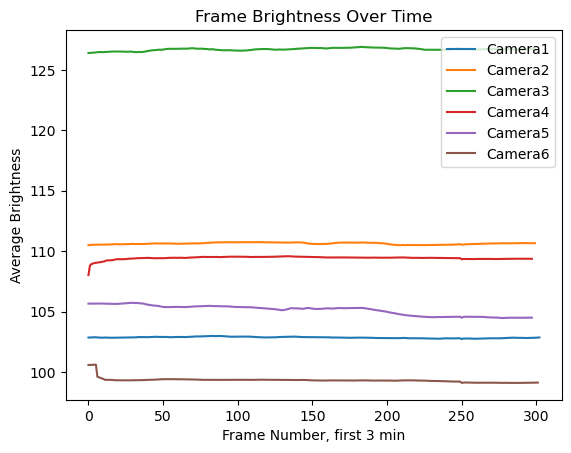

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCB_14_31: {'Camera1': [], 'Camera2': [], 'Camera3': [], 'Camera4': [], 'Camera5': [], 'Camera6': []}
Skipping process_calibration_data for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCB_14_31 due to missing drop frames
please mannually process /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCB_14_31
Failed processing: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCB_14_31, status set to 3.
Updated Parquet file at /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCB_14_31/folder_log.parquet with new status.


In [7]:
from utlis.exe_engine_utlis.comb_all_exe import sequential_process_and_update_sync

sequential_process_and_update_sync(filtered_table, base_folder, max_frames=800) #threshold=2, max_frames=300, min_frame=0